In [1]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [3]:
train_data = datagen.flow_from_directory(
    directory='C:\\Users\\DHINESH KANNA\\Downloads\\archive\\animals\\animals',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 5400 images belonging to 90 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(90, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=10)

In [5]:
from keras.models import load_model
loaded_model = load_model('my_model.h5')

In [6]:
test_data = datagen.flow_from_directory(
    directory='C:/Users/DHINESH KANNA/Downloads/archive/animals/animals',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)



Found 5400 images belonging to 90 classes.


In [13]:
from tensorflow.keras.utils import load_img, img_to_array 

test_image = load_img('C:/Users/DHINESH KANNA/Downloads/archive/animals/animals/antelope/0a37838e99.jpg', target_size = (64, 64))
#test_image = img_to_array(test_image)

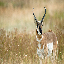

In [14]:
test_image

In [15]:
import numpy as np 
x = img_to_array(test_image)
x = np.expand_dims(x, axis =0)

x.shape

(1, 64, 64, 3)

In [18]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('C:/Users/DHINESH KANNA/Downloads/archive/animals/animals/antelope/0a37838e99.jpg', target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet50.preprocess_input(x)

In [19]:
x = tf.image.resize(x, size=(224, 224))
pred = np.argmax(model.predict(x), axis = 1)

pred

1/1 [==============================] - 0s 236ms/step


array([19], dtype=int64)

In [20]:
pred = np.argmax(model.predict(x), axis=1)

1/1 [==============================] - 0s 76ms/step


In [21]:
print(pred)

[19]


In [14]:
import os
import numpy as np 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Define the class labels
class_labels = sorted(os.listdir('C:/Users/DHINESH KANNA/Downloads/archive/animals/animals'))

# Load and preprocess the test image
test_image = load_img('C:/Users/DHINESH KANNA/Downloads/archive/animals/animals/antelope/0a37838e99.jpg', target_size=(224, 224))
x = img_to_array(test_image)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet50.preprocess_input(x)

# Get the prediction
prediction = model.predict(x)
class_index = np.argmax(prediction, axis=1)[0]
class_name = class_labels[class_index]

print("Predicted animal class: ", class_name)

1/1 [==============================] - 0s 85ms/step
Predicted animal class:  duck
